In [1]:
import pymongo, pandas as pd
from pymongo import MongoClient

In [2]:
conn="mongodb://localhost:27017"
client=MongoClient(conn)

In [3]:
df=pd.read_csv('C:\\Users\\Hp\OneDrive\\Desktop\\Mongov4\\Housing.csv')
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [4]:
db=client["Housing1"]
collection=db["Hcollection1"]
collectlist=df.to_dict('records')
collection.insert_many(collectlist)

In [6]:
# Aggregation pipeline
pipeline = [
    {"$match": {"airconditioning": {"$in": ["yes"]}}},  # Filter valid values
    {"$project": {
        "price": 1,
        "area": 1,
        "bedrooms": 1,
        "bathrooms": 1,
        "guestroom":{
            "$cond":[
                {"$eq":["$guestroom","yes"]},
                1,
                0]
        },
        "basement":{
            "$cond":[
                {"$eq":["$basement","yes"]},
                1,
                0]
        },
        "hotwatering":{
            "$cond":[
                {"$eq":["$hotwatering","yes"]},
                1,
                0]
        },
        "mainroad":{
            "$cond":[
                {"$eq":["$mainroad","yes"]},
                1,
                0]
        },
        "prefarea":{
            "$cond":[
                {"$eq":["$prefarea","yes"]},
                1,
                0]
        },
        "furnishingstatus": {
            "$cond": [
                {"$eq": ["$furnishingstatus", "fully-furnished"]},
                2,
                {
                    "$cond": [
                        {"$eq": ["$furnishingstatus", "semi-furnished"]},
                        1,
                        0
                    ]
                }
            ]
        },

        "mainroad": {
            "$cond": [
                {"$eq": ["$mainroad", "yes"]},
                1,
                0
            ]
        }
    }},
    {"$group": {
        "_id": {"price": "$price", "stories":"$stories","area": "$area", "bedrooms": "$bedrooms", "bathrooms": "$bathrooms","guestroom":"$guestroom",'basement':'$basement','hotwaterheating':'$hotwaterheating','airconditioning':'$airconditioning', 'parking':'$parking','prefarea':'$prefarea','furnishingstatus':'$furnishingstatus'},
        "average_price_per_area": {"$avg": {"$divide": ["$price", "$area"]}},
    }},
    {"$sort": {"average_price_per_area": 1}},
    {"$project": {
        "_id": 0,  # Exclude the _id field from the output
        "price": "$_id.price",
        "area": "$_id.area",
        "bedrooms": "$_id.bedrooms",
        'hotwaterheating':'$_id.hotwaterheating',
        'airconditioning':1,
        "bathrooms": "$_id.bathrooms",
        "guestroom":"$_id.guestroom",
        'prefarea':'$_id.prefarea',
        "stories":"$_id.stories",
        "mainroad": "$_id.mainroad",
        "furnishingstatus": "$_id.furnishingstatus",
        "average_price_per_area": 1
    }}
]
result = list(collection.aggregate(pipeline))

# Convert the result to a DataFrame
result_df = pd.DataFrame(result)

# Print the DataFrame
print(result_df)
result_df.to_csv('filtered_data.csv')
client.close()

     average_price_per_area     price   area  bedrooms  bathrooms  guestroom  \
0                380.961538   5943000  15600         3          1          0   
1                421.320755   2233000   5300         3          1          0   
2                464.843750   4760000  10240         2          1          0   
3                485.148515   3920000   8080         3          1          0   
4                519.310495   4760000   9166         2          1          0   
..                      ...       ...    ...       ...        ...        ...   
167             1770.000000   4956000   2800         3          2          0   
168             1792.452830  13300000   7420         4          2          0   
169             1895.833333   8645000   4560         3          2          1   
170             1932.608696   8890000   4600         3          2          1   
171             1963.218391   4270000   2175         3          1          1   

     prefarea  furnishingstatus  
0    

In [7]:
import pandas as pd

# Load the data
test_df = pd.read_csv("filtered_data.csv")

# Perform data cleaning and imputation
# ...
test_df

,Unnamed: 0,average_price_per_area,price,area,bedrooms,bathrooms,guestroom,prefarea,furnishingstatus
0,0,380.961538,5943000,15600,3,1,0,0,1
1,1,421.320755,2233000,5300,3,1,0,1,0
2,2,464.843750,4760000,10240,2,1,0,1,0
3,3,485.148515,3920000,8080,3,1,0,0,1
4,4,519.310495,4760000,9166,2,1,0,0,1
...,...,...,...,...,...,...,...,...,...
167,167,1770.000000,4956000,2800,3,2,0,0,1
168,168,1792.452830,13300000,7420,4,2,0,1,0
169,169,1895.833333,8645000,4560,3,2,1,0,0
170,170,1932.608696,8890000,4600,3,2,1,0,0


In [8]:
import pandas as pd

# Load the data and drop the "unnamed:0" column
data = pd.read_csv("filtered_data.csv")
data = data.drop(columns=["Unnamed: 0"])

# Display the shape of the loaded data
print("Shape of the data:", data.shape)

Shape of the data: (172, 8)


In [9]:
import pandas as pd
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor

# Load the data
data = data


# Define features and target variable
X = data.drop(columns=["price"])  # Assuming "price" is the target column
y = data["price"]

# Initialize the base model for RFE
base_model = RandomForestRegressor()

# Initialize RFE and fit it to the data
num_features_to_select = 8  # Choose the desired number of features
rfe = RFE(estimator=base_model, n_features_to_select=num_features_to_select)
rfe.fit(X, y)

# Get the selected features
selected_features_rfe = X.columns[rfe.support_]

print("Selected features:", selected_features_rfe)


Selected features: Index(['average_price_per_area', 'area', 'bedrooms', 'bathrooms', 'guestroom',
       'prefarea', 'furnishingstatus'],
      dtype='object')


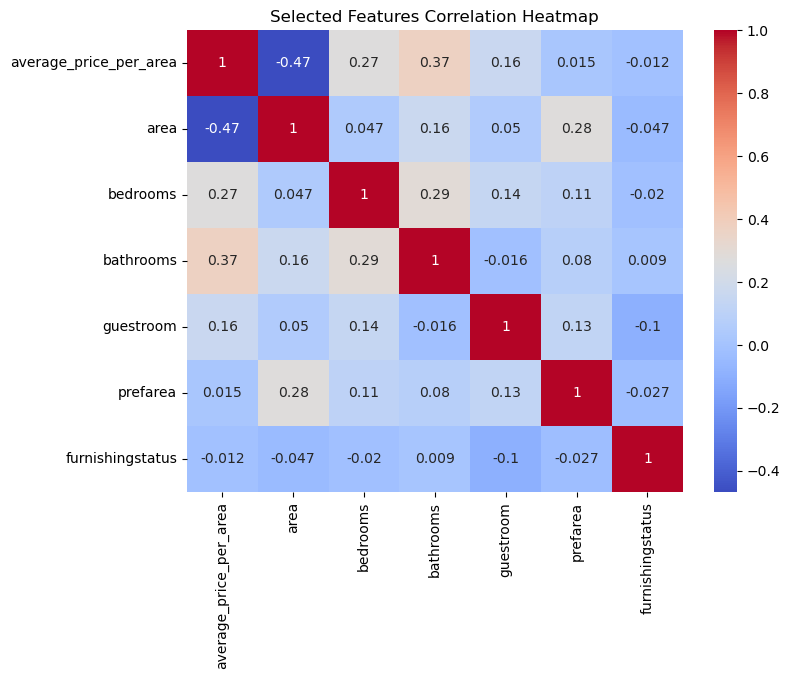

In [10]:
import matplotlib.pyplot as plt 
import seaborn as sns
selected_features_rfe = X.columns[rfe.support_]

# Calculate correlations for selected features
selected_features_correlation = X[selected_features_rfe].corr()

# Visualize correlations using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(selected_features_correlation, annot=True, cmap="coolwarm")
plt.title("Selected Features Correlation Heatmap")
plt.show()

In [11]:
from sklearn.decomposition import PCA
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Calculate VIF for selected features
X_selected = X[selected_features_rfe]
vif_data = pd.DataFrame()
vif_data["Feature"] = X_selected.columns
vif_data["VIF"] = [variance_inflation_factor(X_selected.values, i) for i in range(len(X_selected.columns))]

# Apply PCA to make selected features uncorrelated
pca = PCA()
X_pca = pca.fit_transform(X_selected)

# Variance explained by each principal component
explained_variance_ratio = pca.explained_variance_ratio_

print("Variance explained by each principal component:", explained_variance_ratio)

Variance explained by each principal component: [9.80625151e-01 1.93745513e-02 9.43416603e-08 6.41243782e-08
 5.50905150e-08 4.55225628e-08 3.85317007e-08]


In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Scale the PCA-transformed data using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [13]:
import pandas as pd
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import joblib

y = data["price"]

# Choose the features
X = data.drop(columns=["price"])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply MinMax scaling to the features
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train XGBoost model
xgb_model = XGBRegressor()
xgb_model.fit(X_train_scaled, y_train)

# Use TimeSeriesSplit for cross-validation
cv = TimeSeriesSplit(n_splits=3)



# Define models with corresponding hyperparameters
models = {
    "Ridge": Ridge(),
    "Lasso": Lasso(),
    "Linear Regression": LinearRegression(),
    "XGBoost": XGBRegressor(),
    "Random Forest": RandomForestRegressor(), # Use the wrapped Keras model
}

# Perform cross-validation to evaluate models
scores = {}

for model_name, model in models.items():
    if isinstance(model, KerasRegressor):  # Check if the model is the LSTM estimator
        cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=cv, scoring='neg_mean_squared_error')
        cv_score = -cv_scores.mean()  # Invert the sign to make scores positive
    else:
        cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=cv, scoring='neg_mean_squared_error')
        cv_score = -cv_scores.mean()  # Invert the sign to make scores positive
    
    scores[model_name] = cv_score

# Find the best model
best_model_name = min(scores, key=scores.get)
print("Best model:", best_model_name)
try:
    scores = cross_val_score(best_model, X_train_scaled, y_train, scoring="neg_mean_squared_error", cv=3, error_score='raise')
except Exception as e:
    pass



# Train the selected best model on the entire dataset
best_model = models[best_model_name]
if isinstance(best_model, KerasRegressor):
    best_model.fit(X_test_scaled, y_train, epochs=10, batch_size=32, verbose=0)
else:
    best_model.fit(X_train_scaled, y_train)
# Save the selected best model
joblib.dump(best_model, "best_model.pkl")

# Use the best model for predictions
if isinstance(best_model, KerasRegressor):
    y_pred = best_model.predict(X_test_scaled)
else:
    y_pred = best_model.predict(X_test_scaled)

# Evaluate the model using appropriate metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Model Evaluation:")
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2):", r2)

# Show the input features and predicted outputs
for i in range(len(y_pred)):
    print("Input:", X_test.iloc[i])
    print("Predicted Price:", y_pred[i])
    print()

Best model: Random Forest
Model Evaluation:
Mean Squared Error (MSE): 510231325789.752
Mean Absolute Error (MAE): 471083.72000000003
R-squared (R2): 0.918938258282143
Input: average_price_per_area    1005.747126
area                      3480.000000
bedrooms                     3.000000
bathrooms                    1.000000
guestroom                    0.000000
prefarea                     0.000000
furnishingstatus             0.000000
Name: 76, dtype: float64
Predicted Price: 3519040.0

Input: average_price_per_area    1327.083333
area                      6000.000000
bedrooms                     3.000000
bathrooms                    1.000000
guestroom                    1.000000
prefarea                     0.000000
furnishingstatus             0.000000
Name: 138, dtype: float64
Predicted Price: 7602700.0

Input: average_price_per_area    1446.666667
area                      7500.000000
bedrooms                     3.000000
bathrooms                    3.000000
guestroom            

In [14]:
loaded_model = joblib.load("best_model.pkl")

# Load the new data for testing (replace 'test_data.csv' with your new data file name)
new_data = pd.read_csv("filtered_data.csv")

# Assuming you've already performed the same feature selection, PCA, and scaling steps as before
selected_features_rfe = ['average_price_per_area', 'area', 'bedrooms', 'bathrooms', 'guestroom','prefarea', 'furnishingstatus'] # Your selected features
pca = PCA()
X_pca = pca.fit_transform(new_data[selected_features_rfe])
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_pca)

# Make predictions using the loaded model
predictions = loaded_model.predict(X_scaled)

# Print test inputs and predicted outputs
for i in range(len(predictions)):
    print("Test Input:", new_data.iloc[i])
    print("Predicted Price:", predictions[i])

Test Input: Unnamed: 0                0.000000e+00
average_price_per_area    3.809615e+02
price                     5.943000e+06
area                      1.560000e+04
bedrooms                  3.000000e+00
bathrooms                 1.000000e+00
guestroom                 0.000000e+00
prefarea                  0.000000e+00
furnishingstatus          1.000000e+00
Name: 0, dtype: float64
Predicted Price: 8026620.0
Test Input: Unnamed: 0                1.000000e+00
average_price_per_area    4.213208e+02
price                     2.233000e+06
area                      5.300000e+03
bedrooms                  3.000000e+00
bathrooms                 1.000000e+00
guestroom                 0.000000e+00
prefarea                  1.000000e+00
furnishingstatus          0.000000e+00
Name: 1, dtype: float64
Predicted Price: 2798530.0
Test Input: Unnamed: 0                2.000000e+00
average_price_per_area    4.648438e+02
price                     4.760000e+06
area                      1.024000e+04
bedr

In [16]:
from pymongo import MongoClient
import pandas as pd
import joblib
from sklearn.preprocessing import StandardScaler
conn="mongodb://localhost:27017"
client=MongoClient(conn)
# Load the saved model
loaded_model = joblib.load("best_model.pkl")

# Take user input for 'main_road'
air = input("Is the air conditioner (1 for yes, 0 for no)? ")
air = int(air)

if air == 1:
    # Create a dictionary with the input features
    input_data = {
        'average_price_per_area': float(input("Enter average price per area: ")),
        'area': float(input("Enter area: ")),
        'bedrooms': int(input("Enter number of bedrooms: ")),
        'mainroad': int(input("Is there mainroad (1 for yes, 0 for no)? ")),
        'bathrooms': int(input("Enter number of bathrooms: ")),
        'guestroom': int(input("Is there a guest room (1 for yes, 0 for no)? ")),
        'prefarea': int(input("Is it a preferred area (1 for yes, 0 for no)? ")),
        'furnishingstatus': int(input("Enter furnishing status (2 for fully, 1 for semi, 0 for none): "))
    }

    # Convert the input dictionary to a DataFrame
    input_df = pd.DataFrame([input_data])

    # Replace this with your actual selected features obtained from feature selection
    selected_features = ['average_price_per_area', 'area', 'bedrooms', 'bathrooms', 'guestroom','prefarea', 'furnishingstatus']

    # Apply the same scaling steps as before
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(input_df[selected_features])

    # Make predictions using the loaded model
    predictions = loaded_model.predict(X_scaled)

    print("Predicted Price:", predictions[0])

    # Insert the input data into MongoDB collection
    client = MongoClient("mongodb://localhost:27017/")
    db = client["Housing_Result"]
    collection = db["HcollResult"]

    input_dict = input_data.copy()
    input_dict['Predicted'] = f'Rs. {predictions[0]}'

    # Insert the dictionary into the collection
    collection.insert_one(input_dict)

else:
    print("Air Conditioner is not selected, so prediction is not applicable.")
client.close()

Predicted Price: 2759190.0
